# Student Information
Name: 黃宇加

Student ID: 110034011

GitHub ID: REX722

---

# Second: New Dataset

## 1. Data Source

* Data的來源為[Hugging face](https://huggingface.co/datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data)，裡面收集了1500則YouTube的留言。

* 資料集共有二欄，包括'comment與'sentiment'，'sentiment'的欄位分為'nostalgia'與'not nostalgia'

## 2. Data Preparation

In [4]:
import pandas as pd
import numpy as np
df = pd.read_csv("Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data.csv")
df = df[['comment', 'sentiment']]
df.shape

(1500, 2)

In [5]:
df

,comment,sentiment
0,He was a singer with a golden voice that I lov...,not nostalgia
1,The mist beautiful voice ever I listened to hi...,nostalgia
2,I have most of Mr. Reeves songs. Always love ...,nostalgia
3,30 day leave from 1st tour in Viet Nam to conv...,not nostalgia
4,listening to his songs reminds me of my mum wh...,nostalgia
...,...,...
1495,"i don't know!..but the opening of the video,.....",not nostalgia
1496,it's sad this is such a beautiful song when yo...,not nostalgia
1497,"Dear Friend, I think age and time is not that ...",not nostalgia
1498,I was born in 1954 and started to be aware of ...,nostalgia


In [6]:
df.sentiment.unique()

array(['not nostalgia', 'nostalgia'], dtype=object)

---

因為原本的資料集就是可以直接用pandas dataframe，所以省略轉換Dictionary到Pandas Dataframe的步驟

## 3. Data Mining Using Pandas

### 3.1 Dealing with Missing Values

In [7]:
import helpers.data_mining_helpers as dmh

In [8]:
df.isnull().apply(lambda x: dmh.check_missing_values(x))

,comment,sentiment
0,The amoung of missing records is:,The amoung of missing records is:
1,0,0


從以上的結果可以看出資料中沒有缺失值

### 3.2 Dealing with Duplicate Data

In [9]:
sum(df.duplicated())

1

In [10]:
df.drop_duplicates(keep=False, inplace=True)

In [11]:
sum(df.duplicated())

0

In [12]:
df.shape

(1498, 2)

從以上結果可以看出資料中有兩筆相同的row，刪除相同的row後剩下1498筆資料

---

## 4. Data Preprocessing

### 4.1 Sampling

In [13]:
df_sample = df.sample(1000, random_state = 42)

In [14]:
temp_df = pd.DataFrame({'df':df.sentiment.value_counts(), 
                        'df_sample':df_sample.sentiment.value_counts()})
temp_df

,df,df_sample
sentiment,,
nostalgia,750,488
not nostalgia,748,512


<Axes: title={'center': 'Category distribution'}, xlabel='sentiment'>

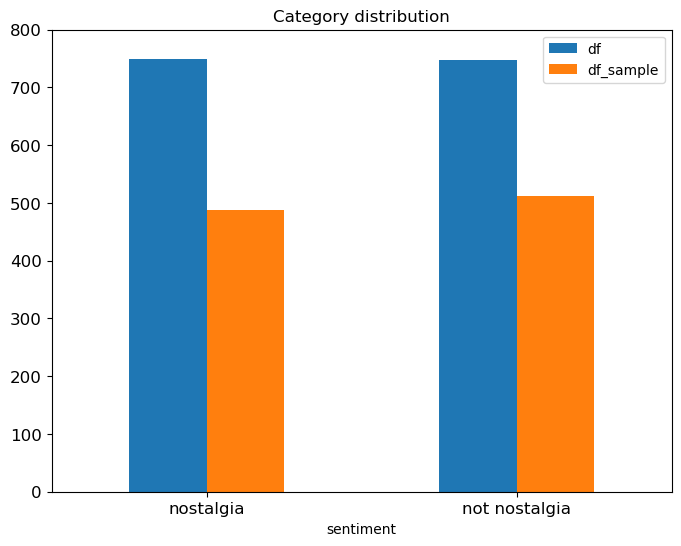

In [15]:
temp_df.plot(kind='bar',
       title='Category distribution',
       ylim=(0,800),
       rot = 0, 
       fontsize = 12, 
       figsize = (8,6),
       legend = ['df', 'df_sample'])

從上面的結果可以發現，sample後的兩個種類比例差不多，沒有類別不平衡的問題

### 4.2 Feature Creation

In [16]:
import nltk

In [17]:
df['unigrams'] = df['comment'].apply(lambda x: dmh.tokenize_text(x))

In [18]:
df.head(5)

,comment,sentiment,unigrams
0,He was a singer with a golden voice that I lov...,not nostalgia,"[He, was, a, singer, with, a, golden, voice, t..."
1,The mist beautiful voice ever I listened to hi...,nostalgia,"[The, mist, beautiful, voice, ever, I, listene..."
2,I have most of Mr. Reeves songs. Always love ...,nostalgia,"[I, have, most, of, Mr., Reeves, songs, ., Alw..."
3,30 day leave from 1st tour in Viet Nam to conv...,not nostalgia,"[30, day, leave, from, 1st, tour, in, Viet, Na..."
4,listening to his songs reminds me of my mum wh...,nostalgia,"[listening, to, his, songs, reminds, me, of, m..."


In [19]:
print(df.loc[0, 'unigrams'])

['He', 'was', 'a', 'singer', 'with', 'a', 'golden', 'voice', 'that', 'I', 'love', 'to', 'hear', 'all', 'the', 'time', '.', 'I', 'was', 'his', 'great', 'fan', 'at', 'the', 'age', 'of', '16years', 'in', 'those', 'days', 'and', 'still', 'now', '.', 'Although', 'we', 'have', 'many', 'singers', 'now', ',', 'but', ',', 'I', 'can', 'vouch', 'for', 'Jim', 'Reeves', 'all', 'the', 'time', '.', 'You', 'feel', 'relaxed', ',', 'emotional', 'and', 'loving', '.', 'Thank', 'you', 'Lord', 'for', 'his', 'life', '.']


### 4.3 Feature subset selection

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(df.comment)
print(df_counts.shape)
print(df_counts[1])

(1498, 3730)
  (0, 3570)	1
  (0, 3534)	2
  (0, 2028)	1
  (0, 3336)	1
  (0, 3284)	2
  (0, 1651)	1
  (0, 2341)	1
  (0, 258)	1
  (0, 3124)	1
  (0, 2186)	1
  (0, 410)	1
  (0, 1177)	1
  (0, 1983)	1
  (0, 1646)	1
  (0, 3610)	1
  (0, 1876)	1
  (0, 2976)	1
  (0, 2287)	1
  (0, 1358)	1
  (0, 256)	1
  (0, 259)	1


In [21]:
count_vect.get_feature_names_out()[-10:]

array(['yours', 'yourself', 'youth', 'youthful', 'youtube', 'yrs', 'yuo',
       'yup', 'zealand', 'zulus'], dtype=object)

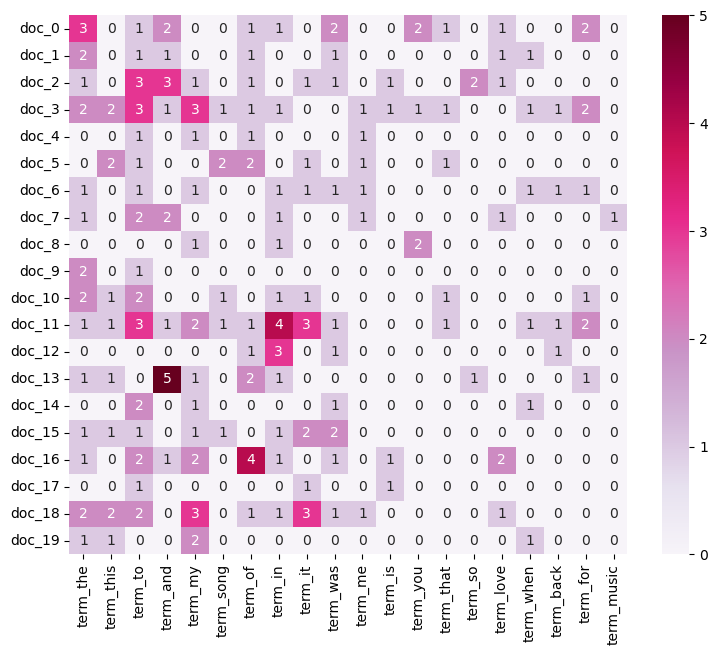

In [22]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
top_20_frequence_terms_index = np.argsort(-np.asarray(df_counts.sum(axis=0))[0])[0:20] # 先找出前20多出現次數的index
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[top_20_frequence_terms_index]] # 利用前面找出的index找出那些字
plot_y = ["doc_"+ str(i) for i in list(df.index)[0:20]] # 看前面20個document
plot_z = df_counts[0:20, top_20_frequence_terms_index].toarray() # 找出前20個document出現整個文件前20多出現次數的字的次數

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                cmap="PuRd",
                annot=True)

從上面的heatmap可以看出在前20個文件中，整份文件出現次數最多的20個字的分布狀況

### 4.4 Attribute Transformation / Aggregation

In [23]:
term_frequencies = np.asarray(df_counts.sum(axis=0))[0]

In [24]:
temp_df = pd.DataFrame(data={
    'terms': count_vect.get_feature_names_out()[top_20_frequence_terms_index],
    'frequencies': term_frequencies[top_20_frequence_terms_index]
})

In [25]:
import plotly.express as px
fig = px.bar(temp_df, x = 'terms', y = 'frequencies')
fig.update_layout(
    xaxis_title="Terms",
    yaxis_title="Frequencies"
)
fig.update_xaxes(tickangle=270)
fig.show()

In [26]:
fig = px.bar(temp_df, x = 'terms', y = 'frequencies', log_y = True)
fig.update_layout(
    xaxis_title="Terms",
    yaxis_title="log(Frequencies)"
)
fig.update_xaxes(tickangle=270)
fig.show()

從上面的圖可以看出出現次數前20多的字的次數分布狀況，且將frequencies取log後，可以比較明顯看出後段的次數的差異

以下是創建term-document DataFrame並過濾掉前5%和後1%的字 

In [27]:
def create_filtered_term_document_df(df, sentiment, top_percent=0.05, bottom_percent=0.01):
    
    # 篩選是nostalgia還是not nostalgia的df
    filtered_df = df[df['sentiment'] == sentiment]
    
    # 創建term-document DataFrame
    count_vect = CountVectorizer()
    X_counts = count_vect.fit_transform(filtered_df['comment'])
    words = count_vect.get_feature_names_out()
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)
    
    # 過濾掉前5%和後1%的字 
    word_sums = term_document_df.sum(axis=0)
    sorted_words = word_sums.sort_values()
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    print(f'Bottom {bottom_percent*100}% words in {sentiment}: \n{sorted_words.head(bottom_n)}')
    print(f'Top {top_percent*100}% words in {sentiment}: \n{sorted_words.tail(top_n)}')
    
    return term_document_df.drop(columns=words_to_remove)

term_document_dfs = {
    'nostalgia': create_filtered_term_document_df(df, sentiment='nostalgia'),
    'not nostalgia': create_filtered_term_document_df(df, sentiment='not nostalgia')
}

Bottom 1.0% words in nostalgia: 
yup            1
gospel         1
rose           1
round          1
rousing        1
goodness       1
routine        1
row            1
ronnie         1
rpg            1
ruined         1
rules          1
running        1
sadder         1
saddest        1
glimpses       1
safer          1
rubbish        1
grabbed        1
grace          1
romanticism    1
rightly        1
dtype: int64
Top 5.0% words in nostalgia: 
takes         30
little        30
singing       31
wonderful     31
makes         31
            ... 
and          472
to           543
this         545
my           566
the          643
Length: 114, dtype: int64
Bottom 1.0% words in not nostalgia: 
00               1
montgomery       1
money            1
monday           1
moments          1
mocking          1
mock             1
mitch            1
misunderstood    1
minute           1
minds            1
miller           1
monumental       1
millennium       1
miles            1
microphone     

從上面可以看到前5%有很多可能沒有什麼意義的stop words，後1%有一些比較不常見的單字

In [28]:
term_document_dfs['nostalgia'] 

,07,10,11,11th,12,13,14,15,16,17,...,yo,yokel,younger,youngster,your,yours,youth,youthful,youtube,yrs
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
746,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
747,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
748,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
from PAMI.extras.convert.DF2DB import DF2DB
obj = DF2DB(term_document_dfs['nostalgia'])
obj.convert2TransactionalDatabase('td_freq_db_nostalgia.csv', '>=', 1)

obj = DF2DB(term_document_dfs['not nostalgia'])
obj.convert2TransactionalDatabase('td_freq_db_not_nostalgia.csv', '>=', 1)

'td_freq_db_not_nostalgia.csv'

Database size (total no of transactions) : 734
Number of items : 2159
Minimum Transaction Size : 1
Average Transaction Size : 8.693460490463215
Maximum Transaction Size : 39
Standard Deviation Transaction Size : 7.213372063492091
Variance in Transaction Sizes : 52.10372252435774
Sparsity : 0.9959733855996001


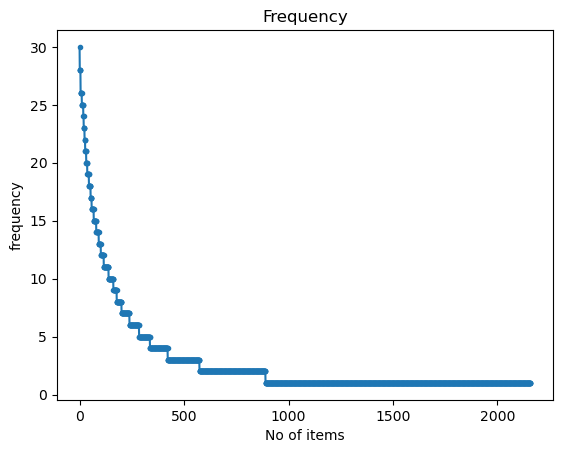

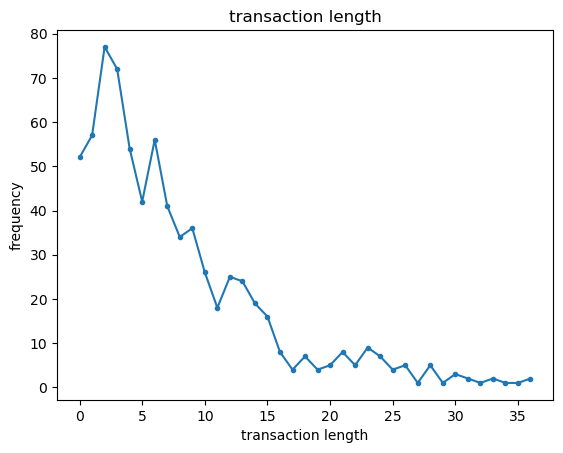

In [30]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 744
Number of items : 2446
Minimum Transaction Size : 1
Average Transaction Size : 8.416666666666666
Maximum Transaction Size : 46
Standard Deviation Transaction Size : 5.952413594380544
Variance in Transaction Sizes : 35.47891431135038
Sparsity : 0.996559007904061


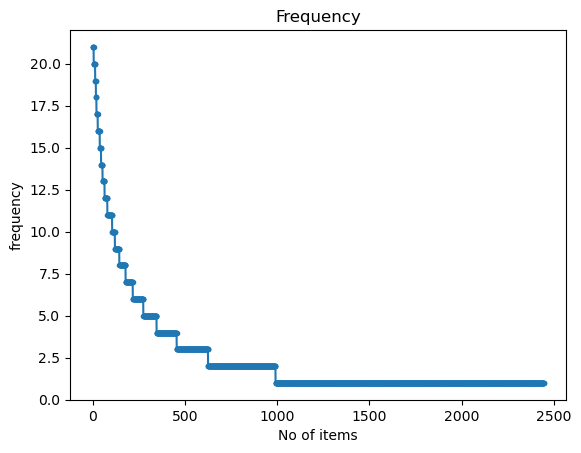

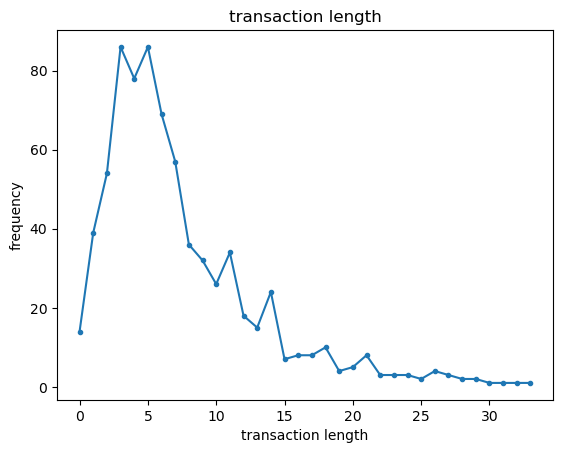

In [31]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_not_nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

從上面的分析可以發現有蠻多transaction的長度都不長，所以將minSup設得比較小

In [32]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=2
obj = alg.FPGrowth(iFile='td_freq_db_nostalgia.csv', minSup=minSup)
obj.mine()
frequentPatternsDF_nostalgia= obj.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_nostalgia))) #print the total number of patterns
print('Runtime: ' + str(obj.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 3805
Runtime: 0.038997650146484375


In [33]:
obj.save('freq_patterns_nostalgia_minSup2.txt') #save the patterns
frequentPatternsDF_nostalgia

,Patterns,Support
0,gentle,2
1,gentle no,2
2,jesus,2
3,jesus town,2
4,job,2
...,...,...
3800,will,28
3801,will go,2
3802,will favorite,3
3803,go,28


In [34]:
minSup=2
obj = alg.FPGrowth(iFile='td_freq_db_not_nostalgia.csv', minSup=minSup)
obj.mine()
frequentPatternsDF_not_nostalgia= obj.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_not_nostalgia))) #print the total number of patterns
print('Runtime: ' + str(obj.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 2127
Runtime: 0.030997276306152344


In [35]:
obj.save('freq_patterns_not_nostalgia_minSup2.txt') #save the patterns
frequentPatternsDF_not_nostalgia

,Patterns,Support
0,lord,2
1,relaxed,2
2,2nd,2
3,2nd came,2
4,marry,2
...,...,...
2122,loved,21
2123,them,21
2124,them every,4
2125,lyrics,21


篩選出只在nostalgia或只在not nostalgia中出現的patterns

In [36]:
patterns_nostalgia = set(frequentPatternsDF_nostalgia['Patterns'])
patterns_not_nostalgia = set(frequentPatternsDF_not_nostalgia['Patterns'])

# 找到只出現在一個 dataframe 中的 pattern
unique_patterns_nostalgia = patterns_nostalgia - patterns_not_nostalgia
unique_patterns_not_nostalgia = patterns_not_nostalgia - patterns_nostalgia
unique_patterns = unique_patterns_nostalgia.union(unique_patterns_not_nostalgia)

# 計算同時出現在兩個類別的patterns數量
total_patterns_count = len(frequentPatternsDF_nostalgia) + len(frequentPatternsDF_not_nostalgia)
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# 刪掉同時出現在兩個類別的patterns
filtered_nostalgia_df = frequentPatternsDF_nostalgia[frequentPatternsDF_nostalgia['Patterns'].isin(unique_patterns)]
filtered_not_nostalgia_df = frequentPatternsDF_not_nostalgia[frequentPatternsDF_not_nostalgia['Patterns'].isin(unique_patterns)]

# 合併篩選後的dataframe並依support大小排序
final_pattern_df = pd.concat([filtered_nostalgia_df, filtered_not_nostalgia_df], ignore_index=True)
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

# 顯示結果
print(final_pattern_df)
print(f"Number of patterns discarded: {discarded_patterns_count}")

            Patterns  Support
3287            will       28
3284           would       28
3283            ever       28
3268            such       26
3279            wish       26
...              ...      ...
1752  together other        2
1753  together along        2
1754    together has        2
1755     along going        2
2451        rip will        2

[4902 rows x 2 columns]
Number of patterns discarded: 1030


將pattern與term_document matrix合併

In [37]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
df_tdm = count_vect.fit_transform(df['comment'])
terms = count_vect.get_feature_names_out()

df['tokenized_comment'] = df['comment'].str.split().apply(set)

pattern_matrix = pd.DataFrame(0, index=df.index, columns=final_pattern_df['Patterns'])

pattern_matrix = pd.DataFrame(
    {
        pattern: df['tokenized_comment'].apply(lambda x: int(pattern_words.issubset(x)))
        for pattern in final_pattern_df['Patterns']
        for pattern_words in [set(pattern.split())]
    }
)

tdm_df = pd.DataFrame(df_tdm.toarray(), columns=terms, index=df.index)

augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

augmented_df

,00,000,045,07,10,100,10m,11,11th,12,...,record left home,left about,left us too,left karen,together see,together other,together along,together has,along going,rip will
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 4.5 Dimensionality Reduction

利用term_document的dataframe做降維

In [38]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

df_pca_tdm = PCA(n_components=2, random_state=42).fit_transform(tdm_df.values)
df_tsne_tdm = TSNE(n_components=2, random_state=42).fit_transform(tdm_df.values)
df_umap_tdm = umap.UMAP(n_components=2, random_state=42).fit_transform(tdm_df.values)

c:\Users\Rex\anaconda3\Lib\site-packages\umap\umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



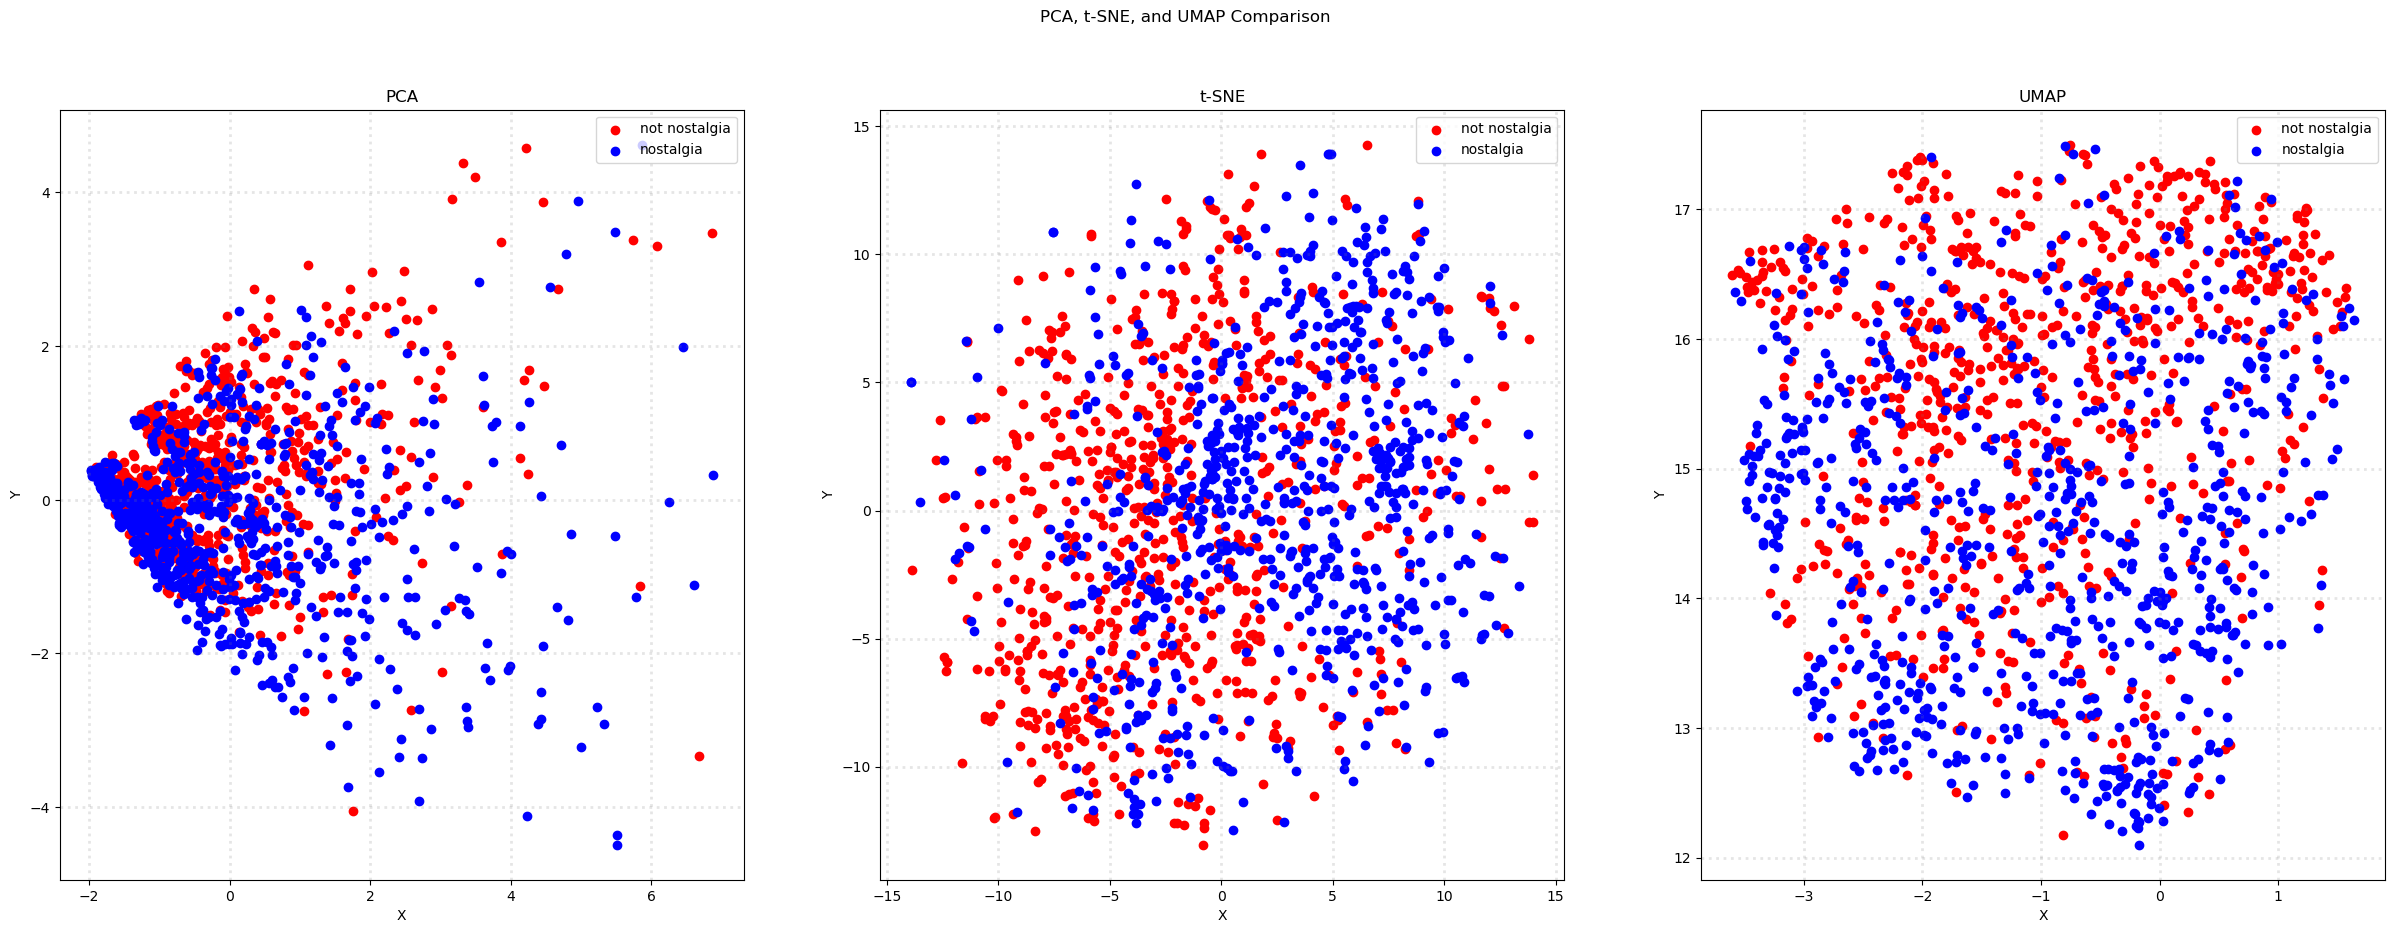

In [39]:
col = ['red', 'blue']
categories = df['sentiment'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[df['sentiment'] == category].T[0]
        ys = X_reduced[df['sentiment'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

plot_scatter(axes[0], df_pca_tdm, 'PCA')
plot_scatter(axes[1], df_tsne_tdm, 't-SNE')
plot_scatter(axes[2], df_umap_tdm, 'UMAP')

plt.show()

利用augmented_df再做另一次降維

In [40]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

df_pca_tdm = PCA(n_components=2, random_state=42).fit_transform(augmented_df.values)
df_tsne_tdm = TSNE(n_components=2, random_state=42).fit_transform(augmented_df.values)
df_umap_tdm = umap.UMAP(n_components=2, random_state=42).fit_transform(augmented_df.values)

c:\Users\Rex\anaconda3\Lib\site-packages\umap\umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



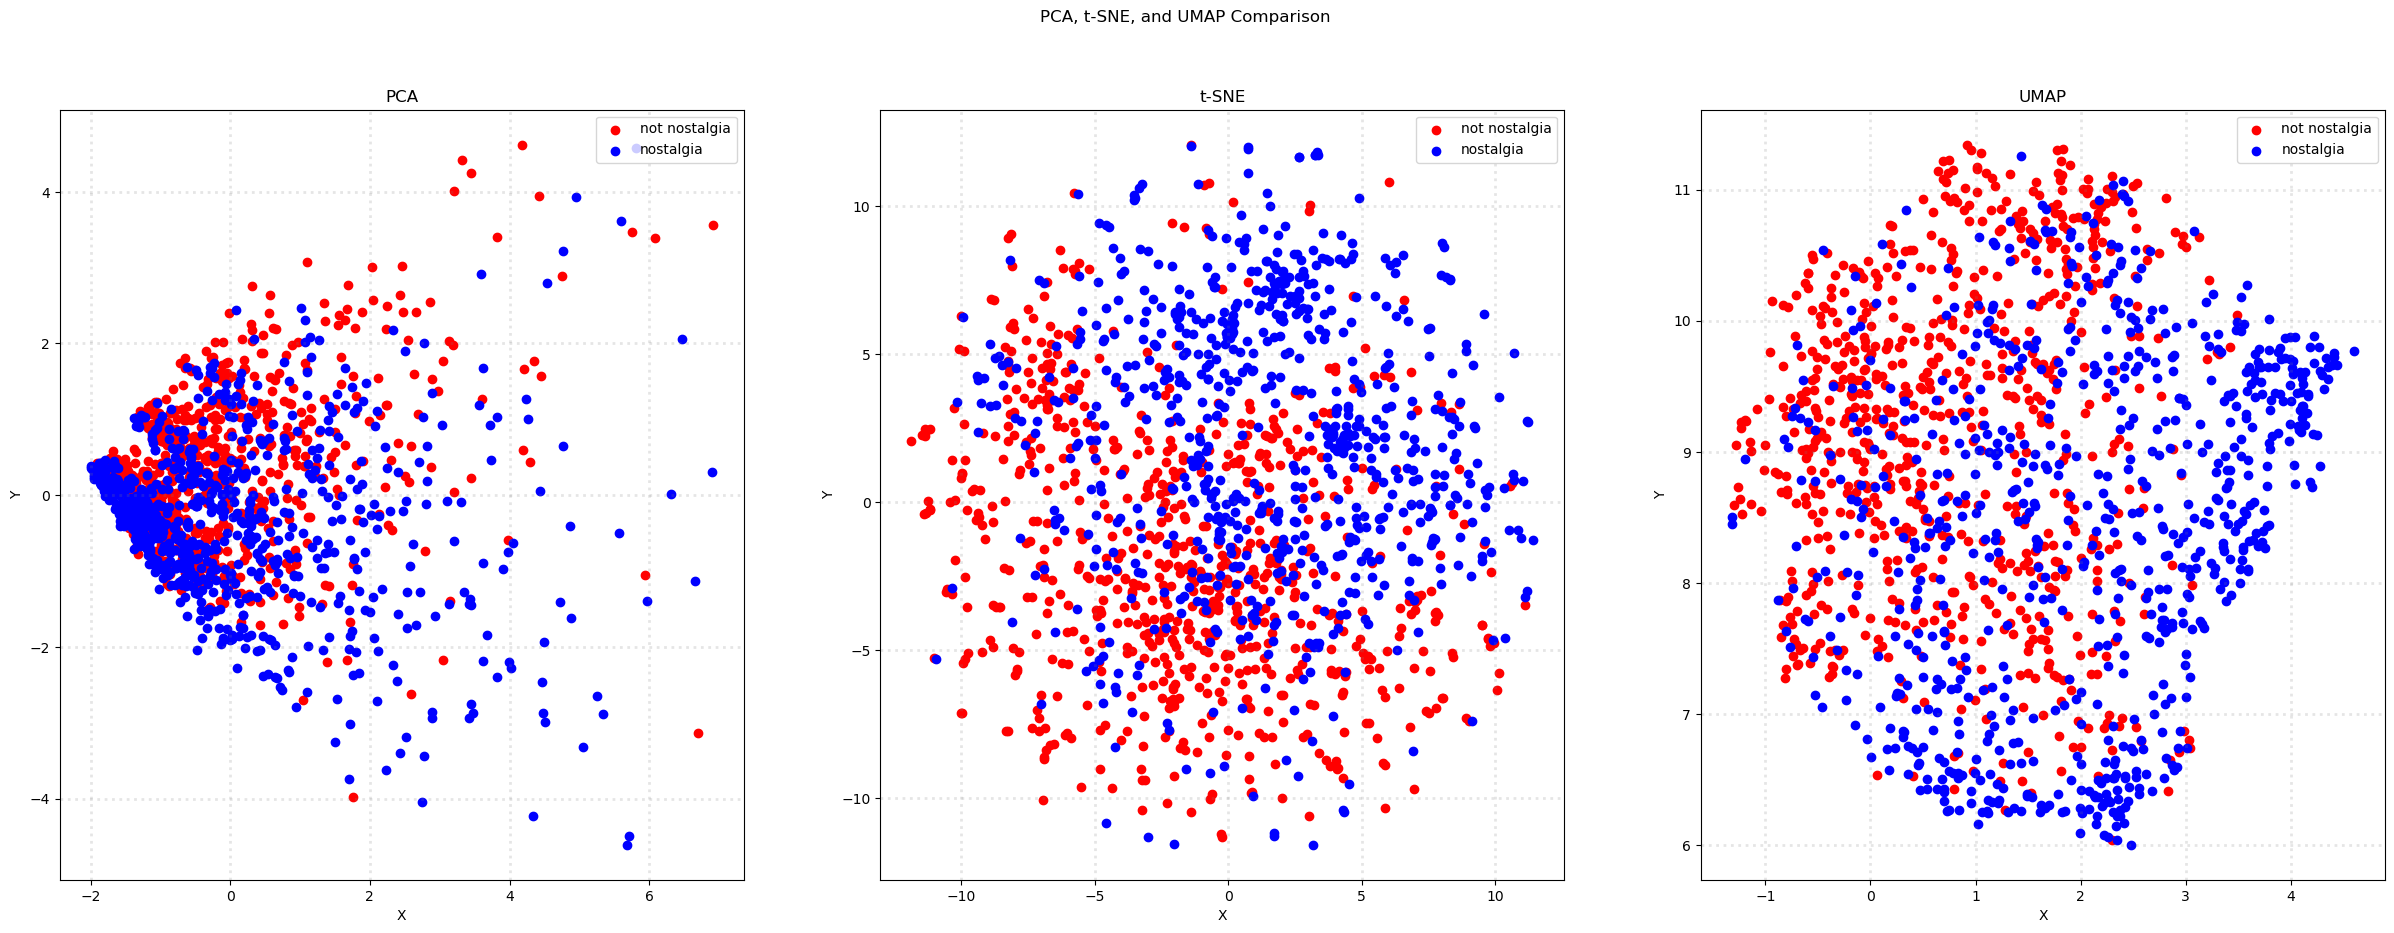

In [41]:
col = ['red', 'blue']
categories = df['sentiment'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

def plot_scatter(ax, df_reduced, title):
    for c, category in zip(col, categories):
        xs = df_reduced[df['sentiment'] == category].T[0]
        ys = df_reduced[df['sentiment'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

plot_scatter(axes[0], df_pca_tdm, 'PCA')
plot_scatter(axes[1], df_tsne_tdm, 't-SNE')
plot_scatter(axes[2], df_umap_tdm, 'UMAP')

plt.show()

比較單純的term_document與加入unique patter的augment_df，可以看出PCA並沒有太大的差別；t-SNE感覺有比較好一些，但比較像是鏡像反轉；UMAP在分類的效果上有明顯的提升

由於UMAP表現感覺比較好一點，所以再將UMAP降到三維空間做圖

In [42]:
df_umap_aug = umap.UMAP(n_components=3).fit_transform(augmented_df.values)

In [43]:
from mpl_toolkits.mplot3d import Axes3D 

col = ['red', 'blue']
categories = df['sentiment'].unique() 

def plot_3d_scatter(ax, df_reduced, title, elev, azim):
    for c, category in zip(col, categories):
        xs = df_reduced[df['sentiment'] == category].T[0]
        ys = df_reduced[df['sentiment'] == category].T[1]
        zs = df_reduced[df['sentiment'] == category].T[2]
        ax.scatter(xs, ys, zs, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend(loc='upper right')
    
    ax.view_init(elev=elev, azim=azim)

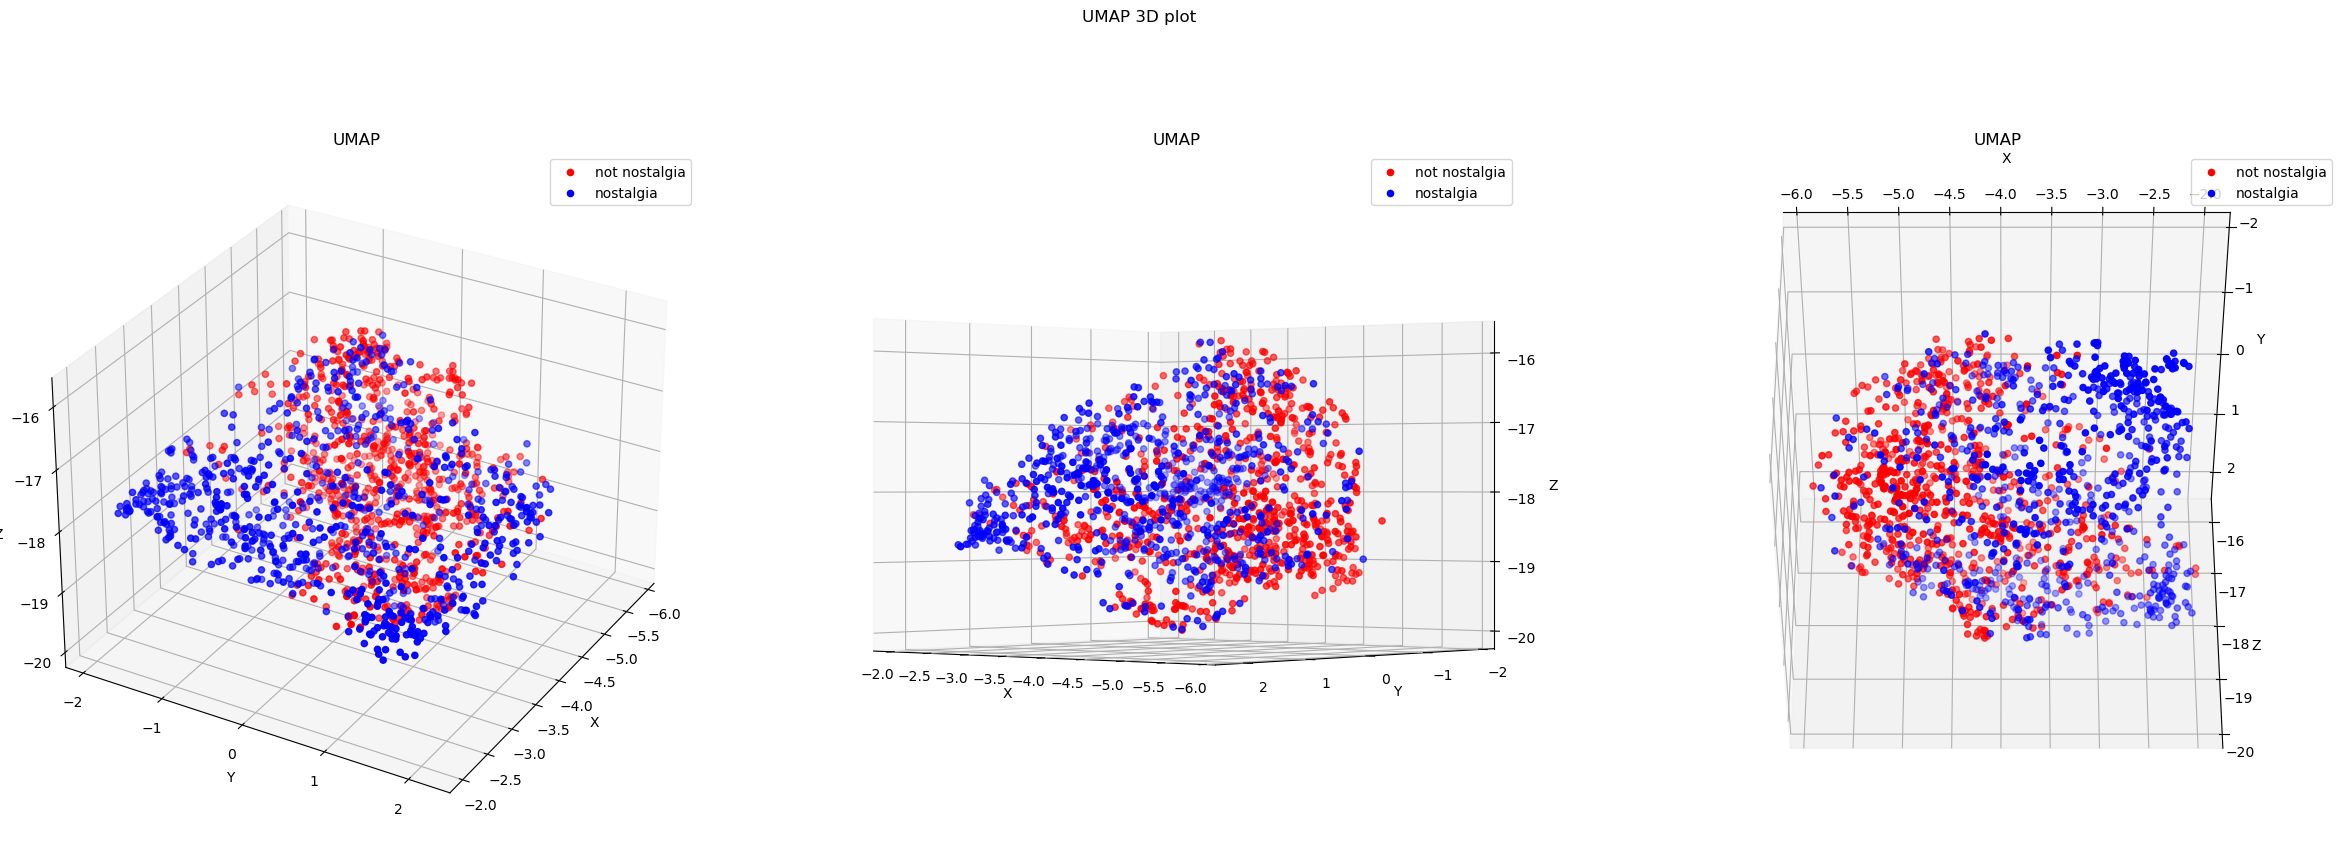

In [44]:
fig = plt.figure(figsize=(30, 10))
fig.suptitle('UMAP 3D plot')

ax1 = fig.add_subplot(131, projection='3d')
plot_3d_scatter(ax1, df_umap_aug, 'UMAP', elev=30, azim=30)

ax2 = fig.add_subplot(132, projection='3d')
plot_3d_scatter(ax2, df_umap_aug, 'UMAP', elev=0, azim=130)

ax3 = fig.add_subplot(133, projection='3d')
plot_3d_scatter(ax3, df_umap_aug, 'UMAP', elev=-40, azim=270)

plt.show()

從3D的視角來看，分割的效果看起來還不錯

### 4.6 Discretization and Binarization

In [45]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(df.sentiment)
df['bin_sentiment'] = mlb.transform(df['sentiment'])

In [46]:
df.head(5)

,comment,sentiment,unigrams,tokenized_comment,bin_sentiment
0,He was a singer with a golden voice that I lov...,not nostalgia,"[He, was, a, singer, with, a, golden, voice, t...","{life., time., fan, was, in, we, can, for, a, ...",1
1,The mist beautiful voice ever I listened to hi...,nostalgia,"[The, mist, beautiful, voice, ever, I, listene...","{was, when, a, beautiful, ever, mist, of, voic...",0
2,I have most of Mr. Reeves songs. Always love ...,nostalgia,"[I, have, most, of, Mr., Reeves, songs, ., Alw...","{Jesus, was, --, up, how, gentle, a, forgot, a...",0
3,30 day leave from 1st tour in Viet Nam to conv...,not nostalgia,"[30, day, leave, from, 1st, tour, in, Viet, Na...","{1st, Mary, in, Lou, Viet, when, greatest, cam...",1
4,listening to his songs reminds me of my mum wh...,nostalgia,"[listening, to, his, songs, reminds, me, of, m...","{to, songs, reminds, me, mum, everyday, listen...",0


---

## 5. Data Exploration

利用cosine similarity計算不同document是否相似

In [47]:
document_to_transform_1 = []
document_to_transform_1.append(df.loc[50, 'comment'])
document_to_transform_2 = []
document_to_transform_2.append(df.loc[100, 'comment'])
document_to_transform_3 = []
document_to_transform_3.append(df.loc[150, 'comment'])

print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['If I remember correctly, this song came out after Mr. Reeves passed away. I was about 10 years old when the disc jockey said that the news just came over the wire that he died in a plane crash.']
['My grandma really loved elvis ???s music .. so we played this song at her funeral .. everytime i listen to this Song there are so many memories in my head']
["My grandad listens this on a CD with me and I learned the words but sadly he passed away and we will miss and love him I lost him when I'm 11 I will always miss him:("]


In [48]:
from sklearn.preprocessing import binarize

document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [49]:
from sklearn.metrics.pairwise import cosine_similarity

cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

Cosine Similarity using count bw 1 and 2: 0.124611
Cosine Similarity using count bw 1 and 3: 0.170251
Cosine Similarity using count bw 2 and 3: 0.121988


---

## 6. Data Classification

利用MultinomialNB分類，並將train/test切成70/30

### 6.1 Classification with term document DataFrame

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

category_mapping = dict(df[['bin_sentiment', 'sentiment']].drop_duplicates().values)
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

X_train, X_test, y_train, y_test = train_test_split(tdm_df, df['bin_sentiment'], test_size=0.3, random_state=42)

In [51]:
X_train

,00,000,045,07,10,100,10m,11,11th,12,...,yours,yourself,youth,youthful,youtube,yrs,yuo,yup,zealand,zulus
890,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1397,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
709,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1273,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
940,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1132,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1296,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
862,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1461,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

y_pred = nb_classifier.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.8822222222222222

Classification Report:
                precision    recall  f1-score   support

    nostalgia     0.8286    0.9486    0.8845       214
not nostalgia     0.9463    0.8220    0.8798       236

     accuracy                         0.8822       450
    macro avg     0.8875    0.8853    0.8822       450
 weighted avg     0.8903    0.8822    0.8821       450



### 6.2 Classification with augmented DataFrame

In [53]:
category_mapping = dict(df[['bin_sentiment', 'sentiment']].drop_duplicates().values)
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

X_train, X_test, y_train, y_test = train_test_split(augmented_df, df['bin_sentiment'], test_size=0.3, random_state=42)

In [54]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

y_pred = nb_classifier.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.9

Classification Report:
                precision    recall  f1-score   support

    nostalgia     0.8690    0.9299    0.8984       214
not nostalgia     0.9321    0.8729    0.9015       236

     accuracy                         0.9000       450
    macro avg     0.9006    0.9014    0.9000       450
 weighted avg     0.9021    0.9000    0.9001       450



### 6.3 Result

1. 從上面可以看到利用增加unique pattern欄位的augmented_df，讓分類的準確度從0.88提升到0.9

2. 雖然not nostalgia的precision有些微下降，但在nostalgia與not nostalgia的f1-score都有變高

# Third: Data Visualization and TF-IDF

## 1. Data Visualization

1.1 因為覺得nostalgia的留言長度可能會比not nostalgia來得長，所以如果確實有這個現象，也可以將長度做為一個新的feature，但從boxplot的圖中並沒有明顯看出兩種類別的留言長度不同

In [55]:
# 計算兩個類別中每個document的comment長度，並畫成boxplot
comment_length = pd.concat([
    pd.DataFrame({'sentiment': sentiment, 'comment_length': df[df['sentiment'] == sentiment]['comment'].apply(len)})
    for sentiment in ['nostalgia', 'not nostalgia']
])

fig = px.box(comment_length, x='sentiment', y='comment_length', title="Comment Length Distribution by Sentiment")
fig.update_layout(yaxis_title="Comment Length", xaxis_title="Sentiment")
fig.show()

1.2 因為nostalgia可能包括較多的過去式動詞，圖中只計算was和were的數量，可以再新增其它過去式動詞，而從圖中可以看出在nostalgia中確實有比較多的過去式be動詞

In [56]:
def count_past_tense_sum(df):
    count_vect = CountVectorizer()
    df_counts = count_vect.fit_transform(df['comment'])
    words = count_vect.get_feature_names_out()
    term_document_df = pd.DataFrame(df_counts.toarray(), columns=words)
    past_tense = ['was', 'were']
    return term_document_df[past_tense].sum().sum()

nostalgia_was_were_count = count_past_tense_sum(df[df['sentiment'] == 'nostalgia'])
not_noalgia_was_were_count = count_past_tense_sum(df[df['sentiment'] == 'not nostalgia'])
fig = px.bar(x = ['nostalgia', 'not nostalgia'], 
             y = [nostalgia_was_were_count, not_noalgia_was_were_count],
             title='Past tense count by Sentiment')
fig.update_layout(yaxis_title="Past tense count", xaxis_title="Sentiment")
fig.show()

## 2. TF-IDF

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer
# 產生df的tfidf matrix
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(df['comment'])
tfidf.shape

(1498, 3730)

In [58]:
# 將tfidf轉換成term_docuent的型式
words = vectorizer.get_feature_names_out()
tfidf_df = pd.DataFrame(tfidf.toarray(), columns=words)
tfidf_df

,00,000,045,07,10,100,10m,11,11th,12,...,yours,yourself,youth,youthful,youtube,yrs,yuo,yup,zealand,zulus
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1493,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1494,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


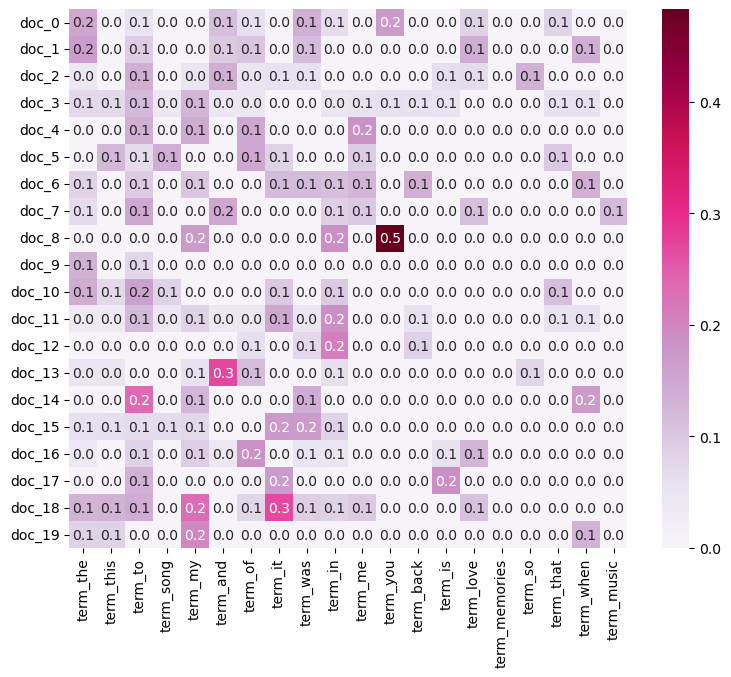

In [59]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
top_20_tfidf_terms_index = np.argsort(-np.asarray(tfidf.sum(axis=0))[0])[0:20]
plot_x = ["term_"+str(i) for i in vectorizer.get_feature_names_out()[top_20_tfidf_terms_index]]
plot_y = ["doc_"+ str(i) for i in list(df.index)[0:20]]
plot_z = tfidf[0:20, top_20_tfidf_terms_index].toarray()
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                cmap="PuRd",
                annot=True,
                fmt ='.1f')

與原本的term frequencies相比，前面的一些stop word的值有比較小一點

## 3. Naive Bayes classifier

### 3.1 Data preparation

In [60]:
# 產生term frequencies df
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(df['comment'])
words = count_vect.get_feature_names_out()
term_frequencies_df = pd.DataFrame(df_counts.toarray(), columns=words)

term_frequencies_df

,00,000,045,07,10,100,10m,11,11th,12,...,yours,yourself,youth,youthful,youtube,yrs,yuo,yup,zealand,zulus
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1493,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1494,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
tfidf_df

,00,000,045,07,10,100,10m,11,11th,12,...,yours,yourself,youth,youthful,youtube,yrs,yuo,yup,zealand,zulus
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1493,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1494,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 3.2 Classification with term frequencies and MutinomialNB

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

category_mapping = dict(df[['bin_sentiment', 'sentiment']].drop_duplicates().values)
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

X_train, X_test, y_train, y_test = train_test_split(term_frequencies_df, df['bin_sentiment'], test_size=0.3, random_state=42)
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

y_pred = nb_classifier.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.8822222222222222

Classification Report:
                precision    recall  f1-score   support

    nostalgia     0.8286    0.9486    0.8845       214
not nostalgia     0.9463    0.8220    0.8798       236

     accuracy                         0.8822       450
    macro avg     0.8875    0.8853    0.8822       450
 weighted avg     0.8903    0.8822    0.8821       450



### 3.3 Classification with TF-IDF and GaussianNB

In [63]:
# 因為tfidf資料是連續型變數，所以需要用GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score

category_mapping = dict(df[['bin_sentiment', 'sentiment']].drop_duplicates().values)
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

X_train, X_test, y_train, y_test = train_test_split(tfidf_df, df['bin_sentiment'], test_size=0.3, random_state=42)
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

y_pred = nb_classifier.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.6511111111111111

Classification Report:
                precision    recall  f1-score   support

    nostalgia     0.6059    0.7617    0.6749       214
not nostalgia     0.7182    0.5508    0.6235       236

     accuracy                         0.6511       450
    macro avg     0.6621    0.6563    0.6492       450
 weighted avg     0.6648    0.6511    0.6480       450



### 3.4 Result

1. **Term Frequencies**的準確率為**0.88**，**TF-IDF**的準確率為**0.65**，TF-IDF的表現比較差

2. 在Term Frequencies中對預測nostalgia和not nostalgia的F1-score差不多，而TF-IDF在預測nostalgia的F1-score比not nostagia高蠻多的

# Fourth: Improvement

1. 因為這個資料集中的類別只有兩種，所以大部份的時候不需要像Master利用迴圈並將不同類別的dataframe儲存在dict或list中，在只有兩種類別的情況下，直接用成兩個dataframe比較清楚易懂。

2. 我將創建term-document DataFrame與之後過濾掉前5%和後1%的字的兩個函式合併成一個，可以直接利用那個函式產生term-document DataFrame並設定域值過濾掉不需要的字。

3. 在5.4中計算unique pattern的時候，因為資料集類別只有兩種，所以可以直接用差集合的運算方式找出unique pattern，不需要像Master中計算pattern出現的次數。

4. 在產生augmented_df中有一串程式碼需要iterate好幾次，且需要用好幾次apply，需要執行的時間較長，調整成dict comprehension的方式速度比較快

5. 在3.6 encode的地方，因為只有兩種，所以不需要tolist()，直接產生0或1